<a href="https://colab.research.google.com/github/irfanbykara/Machine-Learning-Notebooks/blob/main/Heart_Disease_XgBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print('Importing Done...')

Importing Done...


In [ ]:
raw_data = pd.read_csv('heart.csv')
raw_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


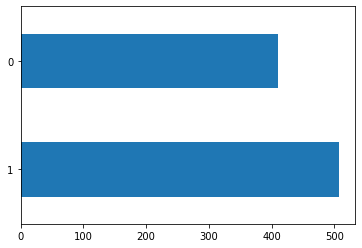

In [ ]:
raw_data['HeartDisease'].value_counts().plot(kind = 'barh')

In [ ]:
raw_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
raw_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



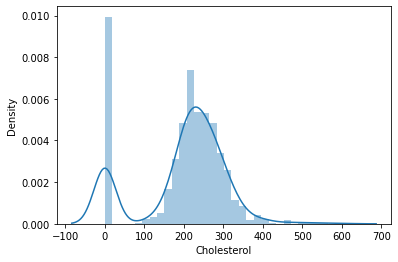

In [ ]:
sns.distplot(raw_data['Cholesterol'])

In [ ]:
# cholesterol_mean = raw_data['Cholesterol'].mean()
# cholesterol_mean

In [ ]:
raw_data['Cholesterol']=raw_data.Cholesterol.mask(raw_data.Cholesterol == 0,cholesterol_mean)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



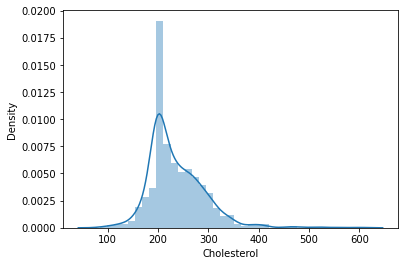

In [ ]:
sns.distplot(raw_data['Cholesterol'])

In [ ]:
data_with_dummies = pd.get_dummies(raw_data, ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], drop_first=True)

In [ ]:
data_with_dummies

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193.0,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131.0,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236.0,0,174,0.0,1,0,1,0,0,0,0,0,1,0


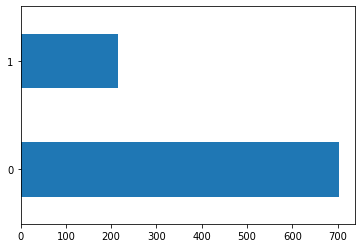

In [ ]:
raw_data['FastingBS'].value_counts().plot(kind = 'barh')

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

print('Done...')

Done...


In [ ]:
X = data_with_dummies.drop('HeartDisease', 1)
y = data_with_dummies['HeartDisease']

X.shape

(918, 15)

In [ ]:
y.shape

(918,)

In [ ]:
trainx, testx, trainy, testy = train_test_split(X,y,test_size=0.2,random_state=42)
dtrain = xgb.DMatrix(trainx, trainy)
dtest = xgb.DMatrix(testx, testy)

# xgboost parametreleri
params = {     
    'booster': 'dart', 'lambda': 2.8249302013552078e-08, 'alpha': 1.884381553628236e-06, 'subsample': 0.42421473990636055, 'colsample_bytree': 0.20293820234806054, 'max_depth': 7, 'min_child_weight': 8, 'eta': 0.00011227893029804868, 'gamma': 0.0022562720867116623, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 2.376630936771107e-07, 'skip_drop': 2.6759604386252883e-05,   
    "objective": "binary:logistic",
    'max_depth': 2,
    'eta': 0.4,
    'silent': 1,
    'object': 'multi:softmax',
    'num_class': 1
}
# egit
bst = xgb.XGBClassifier(**params,
                        )
bst.fit(trainx,trainy)
# test et
preds = bst.predict(testx)


In [ ]:
preds = bst.predict(testx)
labels = dtest.get_label()



In [ ]:
# sklearn performans olcutleri
from sklearn.metrics import precision_score, accuracy_score
print(precision_score(testy, preds, average='macro'))
print(accuracy_score(testy,preds))


0.8485576923076923
0.8532608695652174


In [ ]:
% pip install optuna

In [ ]:
import numpy as np
import optuna
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer,LabelEncoder

import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb

def objective(trial):
    
    df = pd.read_csv("heart.csv")
    df1 = df.copy()
    le = LabelEncoder()
    df1['HeartDisease']=le.fit_transform(df1['HeartDisease'])

    df1= pd.get_dummies(df1)
    X= df1.drop('HeartDisease', axis=1)
    y= df1['HeartDisease']
    
    #(data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
    train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.25)
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dvalid = xgb.DMatrix(valid_x, label=valid_y)
    
    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xgb.train(param, dtrain)
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2021-11-02 15:56:17,324] A new study created in memory with name: no-name-6bf48f67-e136-4091-99b8-71755f39eb5a
[I 2021-11-02 15:56:17,360] Trial 0 finished with value: 0.8478260869565217 and parameters: {'booster': 'gblinear', 'lambda': 1.0176668622378817e-07, 'alpha': 8.241965679200498e-05, 'subsample': 0.9794926809945783, 'colsample_bytree': 0.9399731181630966}. Best is trial 0 with value: 0.8478260869565217.
[I 2021-11-02 15:56:17,394] Trial 1 finished with value: 0.8608695652173913 and parameters: {'booster': 'gbtree', 'lambda': 0.0012217441757304966, 'alpha': 1.4262160060068054e-05, 'subsample': 0.9117975560369775, 'colsample_bytree': 0.5051597134384915, 'max_depth': 5, 'min_child_weight': 2, 'eta': 0.02385631297512938, 'gamma': 0.0008591630929671517, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.8608695652173913.
[I 2021-11-02 15:56:17,430] Trial 2 finished with value: 0.782608695652174 and parameters: {'booster': 'gbtree', 'lambda': 4.3547744063635294e-07, 'alpha

Number of finished trials:  100
Best trial:
  Value: 0.9173913043478261
  Params: 
    booster: gblinear
    lambda: 0.055222323640973466
    alpha: 3.104858397775967e-06
    subsample: 0.45084770213802255
    colsample_bytree: 0.7664913171770491


In [ ]:
from sklearn.metrics import accuracy_score,classification_report, recall_score,confusion_matrix, roc_auc_score, precision_score, f1_score, roc_curve, auc, plot_confusion_matrix,plot_roc_curve

from  xgboost import XGBClassifier
accuracy= []
recall =[]
roc_auc= []
precision = []

df = pd.read_csv("heart.csv")
df1 = df.copy()
le = LabelEncoder()
df1['HeartDisease']=le.fit_transform(df1['HeartDisease'])

df1= pd.get_dummies(df1)
X= df1.drop('HeartDisease', axis=1)
y= df1['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
params = { 'booster': 'gbtree', 'lambda': 0.001810624103124616, 'alpha': 5.155539886255509e-08, 'subsample': 0.8726659831593165, 'colsample_bytree': 0.27520097081786943, 'max_depth': 7, 'min_child_weight': 6, 'eta': 4.357335051999289e-07, 'gamma': 0.003914573724541214, 'grow_policy': 'depthwise'}
xgbc_5 = XGBClassifier(**params
   )

xgbc_5.fit(X_train, y_train)
y_pred = xgbc_5.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['XGBoost_adjusted_weight_5']
result_df6 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df6

,Accuracy,Recall,Roc_Auc,Precision
XGBoost_adjusted_weight_5,0.8877,0.8902,0.8871,0.9182


In [ ]:
% pip install pipdeptree
% pip install optuna

     |████████████████████████████████| 308 kB 4.2 MB/s 
     |████████████████████████████████| 209 kB 50.0 MB/s 
     |████████████████████████████████| 80 kB 8.7 MB/s 
     |████████████████████████████████| 75 kB 4.3 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 144 kB 61.0 MB/s 
     |████████████████████████████████| 111 kB 38.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=20b1814531d419374cab4ad9c57663c5dd8583c599f2f06a4e025445b444e5ae
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import pipdeptree
import optuna
print('Done')

Done


In [ ]:
! pipdeptree --packages optuna

Warning!!! Possibly conflicting dependencies found:
* albumentations==0.1.12
 - imgaug [required: >=0.2.5,<0.2.7, installed: 0.2.9]
* datascience==0.10.6
 - folium [required: ==0.2.1, installed: 0.8.3]
* nbclient==0.5.4
 - jupyter-client [required: >=6.1.5, installed: 5.3.5]
------------------------------------------------------------------------
optuna==2.10.0
  - alembic [required: Any, installed: 1.7.4]
    - importlib-metadata [required: Any, installed: 4.8.1]
      - typing-extensions [required: >=3.6.4, installed: 3.7.4.3]
      - zipp [required: >=0.5, installed: 3.6.0]
    - importlib-resources [required: Any, installed: 5.2.2]
      - zipp [required: >=3.1.0, installed: 3.6.0]
    - Mako [required: Any, installed: 1.1.5]
      - MarkupSafe [required: >=0.9.2, installed: 2.0.1]
    - SQLAlchemy [required: >=1.3.0, installed: 1.4.25]
      - greenlet [required: !=0.4.17, installed: 1.1.2]
      - importlib-metadata [required: Any, installed: 4.8.1]
        - typing-extensions [r